<a href="https://www.suss.edu.sg/courses/detail/anl252?urlname=bachelor-of-science-in-finance-with-minor-ftfnce"><img src = "https://www.python.org/static/community_logos/python-logo-master-v3-TM.png" width = 400> </a>

<h1 align=center><font size = 5>ANL252 - More on Matplotlib and Line Plots</font></h1>

<h1 align=center><font size = 4> Munish Kumar </font></h1>
<h1 align=center><font size = 3> Semester 2 2021 </font></h1>

## Introduction

The aim of this lab is to practice data visualization with Python. I will also introduce different libraries which can be beneficial when we are discussing new visualization concepts.

We will be generating plots and visualizations with data stored in the *pandas* dataframes. 

------------

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Exploring Datasets with *pandas*](#0)<br>
1.1 [The Dataset: Immigration to USA from 1980 to 2013](#2)<br>
1.2 [Importing *pandas* (and Numpy)](#4) <br>
1.3 [*pandas* Intermediate: Indexing and Selection](#6) <br>
2. [Visualizing Data using Matplotlib](#8) <br>
2.1 [Matplotlib: Standard Python Visualization Library](#10) <br>
3. [Line Plots](#12) <br>
4. [Area Plots](#14) <br>
5. [Histogram](#16) <br>
6. [Bar Graph](#18) <br>   
7. [Box Plot](#20) <br>
7. [Bubble Plot](#22) <br>    
</div>
<hr>

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

In this lab, we will focus on the United States of America immigration data.

---

## Importing *pandas* (and numpy)<a id="4"></a>

The first thing we'll do is import two key data analysis modules: *pandas* and **Numpy**.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Let's download and import our primary Immigration dataset using *pandas* `read_excel()` method. To do this, you will would need to download a module which *pandas* requires to read in excel files called **xlrd**. Run the following line of code to install the **xlrd** module:
```
!conda install -c anaconda xlrd --yes
```

In [2]:
#!conda install -c anaconda xlrd --yes

Lets read in our data using 'read_excel' method

In [3]:
df_usa = pd.read_excel('United States of America.xlsx',
                       sheet_name='USA by Place of birth',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Display the top 5 rows of the dataset using the `head()` function.

In [4]:
df_usa.head()
# tip: You can specify the number of rows you'd like to see as follows: df_usa.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Less developed regions,722,...,1617,2196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,More developed regions,30,...,3364,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Less developed regions,175,...,1369,1241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Less developed regions,0,...,-,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,More developed regions,2,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Display the bottom 5 rows of the dataset using the `tail()` function.

In [5]:
df_usa.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
214,Immigrants,Foreigners,Wallis and Futuna Islands,909,Oceania,957,Polynesia,902,Less developed regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
215,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Less developed regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
216,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Less developed regions,160,...,2620,3532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Less developed regions,178,...,643,505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
218,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Less developed regions,246,...,914,924,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Please get some basic information of the dataframe using the `info()` method.

In [6]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 51 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         219 non-null    object 
 1   Coverage     219 non-null    object 
 2   OdName       219 non-null    object 
 3   AREA         219 non-null    int64  
 4   AreaName     219 non-null    object 
 5   REG          219 non-null    int64  
 6   RegName      219 non-null    object 
 7   DEV          219 non-null    int64  
 8   DevName      219 non-null    object 
 9   1980         219 non-null    int64  
 10  1981         219 non-null    int64  
 11  1982         219 non-null    int64  
 12  1983         219 non-null    int64  
 13  1984         219 non-null    int64  
 14  1985         219 non-null    int64  
 15  1986         219 non-null    int64  
 16  1987         219 non-null    int64  
 17  1988         219 non-null    int64  
 18  1989         219 non-null    int64  
 19  1990    

Please list of column headers in the dataframe; use the '.columns' parameter.

In [7]:
df_usa.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'], dtype=object)

Please list of indicies with '.index' parameter.

In [8]:
df_usa.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

As the default type of index and columns is NOT a list, can you use tolist() method to convert them both?

In [9]:
print(type(df_usa.columns))
print(type(df_usa.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [10]:
df_usa.columns.tolist()
df_usa.index.tolist()

print (type(df_usa.columns.tolist()))
print (type(df_usa.index.tolist()))

<class 'list'>
<class 'list'>


Please display the dimensions of the dataframe with the '.shape' parameter.

In [11]:
# size of dataframe (rows, columns)
df_usa.shape    

(219, 51)

Note: The main types stored in *pandas* objects are *float*, *int*, *bool*, *datetime64[ns]* and *datetime64[ns, tz] (in >= 0.17.0)*, *timedelta[ns]*, *category (in >= 0.15.0)*, and *object* (string). In addition these dtypes have item sizes, e.g. int64 and int32. 

Please clean the data set by removing the following unnecessary columns (hint: use the 'drop()' method): 
- 'AREA', 'REG', 'DEV', 'Type', 'Coverage'

In [12]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_usa.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_usa.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2012,2013,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,1617,2196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,3364,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rename the following columns by passing in a dictionary of old and new names (hint: use 'rename' method):
 - 'OdName' --> 'Country'
 - 'AreaName' --> 'Continent', 
 - 'RegName' --> 'Region'
 - 'DevName' --> 'Dev_Status'

In [13]:
df_usa.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region', 'DevName':'Dev_Status'}, inplace=True)
df_usa.columns

Index([    'Country',   'Continent',      'Region',  'Dev_Status',
                1980,          1981,          1982,          1983,
                1984,          1985,          1986,          1987,
                1988,          1989,          1990,          1991,
                1992,          1993,          1994,          1995,
                1996,          1997,          1998,          1999,
                2000,          2001,          2002,          2003,
                2004,          2005,          2006,          2007,
                2008,          2009,          2010,          2011,
                2012,          2013, 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

Add a 'Total' column to sums up the total immigrants by country over the entire period 1980 - 2013

In [14]:
df_usa.dropna(axis='columns', inplace = True)
df_usa['Total'] = df_usa.sum(axis = 1)
df_usa

,Country,Continent,Region,Dev_Status,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,70617
1,Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,80830
2,Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,...,1115,1300,1036,1037,1485,1305,1364,1369,1241,20671
3,American Samoa,Oceania,Polynesia,Less developed regions,0,0,7,7,0,0,...,15,28,11,14,19,14,0,-,0,220
4,Andorra,Europe,Southern Europe,More developed regions,2,3,2,1,0,0,...,0,0,0,0,0,0,0,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Wallis and Futuna Islands,Oceania,Polynesia,Less developed regions,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
215,Western Sahara,Africa,Northern Africa,Less developed regions,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,5
216,Yemen,Asia,Western Asia,Less developed regions,160,230,305,268,324,432,...,3366,4308,2396,1872,3134,3591,3361,2620,3532,49952
217,Zambia,Africa,Eastern Africa,Less developed regions,178,165,165,160,146,169,...,499,672,576,613,704,628,652,643,505,9685


Determine how many null objects there are in the dataset

In [15]:
df_usa.isnull().sum()

Country       0
Continent     0
Region        0
Dev_Status    0
1980          0
1981          0
1982          0
1983          0
1984          0
1985          0
1986          0
1987          0
1988          0
1989          0
1990          0
1991          0
1992          0
1993          0
1994          0
1995          0
1996          0
1997          0
1998          0
1999          0
2000          0
2001          0
2002          0
2003          0
2004          0
2005          0
2006          0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
2013          0
Total         0
dtype: int64

Finally, summarize using the 'describe()' method.

In [16]:
df_usa.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,Total
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,2.190000e+02
mean,2356.356164,2664.757991,2582.630137,2441.716895,2383.365297,2503.260274,2657.168950,2663.666667,2859.602740,4847.730594,...,3153.315068,4294.968037,5016.858447,5669.351598,4713.675799,4964.173516,5074.566210,4685.716895,4786.757991,1.268990e+05
std,6909.338673,9227.595599,8187.311911,7046.541230,6852.522055,7209.956673,7781.141648,7838.767012,8996.907424,28313.283534,...,10033.830558,14471.983943,14681.720340,15921.593198,13907.463141,15945.133401,14412.358012,13353.599755,13891.250377,4.513091e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00
25%,5.500000,4.000000,5.000000,5.000000,2.000000,1.000000,2.000000,3.500000,2.500000,7.000000,...,35.000000,44.000000,52.000000,71.000000,54.000000,63.500000,66.500000,69.000000,70.000000,1.398500e+03
50%,148.000000,124.000000,126.000000,128.000000,118.000000,123.000000,135.000000,132.000000,139.000000,141.000000,...,469.000000,628.000000,832.000000,983.000000,763.000000,769.000000,832.000000,774.000000,728.000000,1.758600e+04
75%,1181.000000,1204.500000,1361.500000,1391.000000,1351.000000,1317.000000,1370.500000,1372.500000,1353.500000,1852.000000,...,2016.500000,2817.500000,3726.500000,4060.500000,3447.500000,3592.000000,3520.000000,3259.500000,3139.000000,7.890350e+04
max,56680.000000,101268.000000,72553.000000,59079.000000,57557.000000,61077.000000,66533.000000,72351.000000,95039.000000,405172.000000,...,115585.000000,175411.000000,161445.000000,173749.000000,148640.000000,189989.000000,164920.000000,139120.000000,143446.000000,5.797114e+06


---
## *pandas* Intermediate: Indexing and Selection (slicing)<a id="6"></a>


### Select Column
**There are two ways to filter on a column name:**

Method 1: Quick and easy, but only works if the column name does NOT have spaces or special characters.
```python
    df.column_name 
        (returns series)
```

Method 2: More robust, and can filter on multiple columns.

```python
    df['column']  
        (returns series)
```

```python 
    df[['column 1', 'column 2']] 
        (returns dataframe)
```
---

Method 1: Filtering on the list of countries ('Country').

In [17]:
df_usa.Country  # returns a series

0                    Afghanistan
1                        Albania
2                        Algeria
3                 American Samoa
4                        Andorra
                 ...            
214    Wallis and Futuna Islands
215               Western Sahara
216                        Yemen
217                       Zambia
218                     Zimbabwe
Name: Country, Length: 219, dtype: object

Method 2: Filtering on the list of countries ('Country') and the data for years 1980 - 1985 (inclusive).

In [18]:
df_usa[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,722,1881,1569,2566,3222,2794
1,Albania,30,11,23,22,32,45
2,Algeria,175,184,190,201,197,202
3,American Samoa,0,0,7,7,0,0
4,Andorra,2,3,2,1,0,0
...,...,...,...,...,...,...,...
214,Wallis and Futuna Islands,0,0,0,0,0,0
215,Western Sahara,0,1,1,2,0,0
216,Yemen,160,230,305,268,324,432
217,Zambia,178,165,165,160,146,169


## Select Row

Here are some ways to select rows:

```python
    df.loc[label]        
        #filters by the labels of the index/column
    df.iloc[index]       
        #filters by the positions of the index/column
```

The default index of the dataset is a numeric range. This makes it very difficult to do a query by a specific country because you will need to know the corressponding index value.

What is the index number for Singapore, Malaysia & Thailand?

In [19]:
print(f"index for Singapore: {df_usa[df_usa['Country']=='Singapore'].index.values}")
print(f"index for Malaysia: {df_usa[df_usa['Country']=='Malaysia'].index.values}")
print(f"index for Thailand: {df_usa[df_usa['Country']=='Thailand'].index.values}")

index for Singapore: [177]
index for Malaysia: [117]
index for Thailand: [192]


Please set the 'Country' column as the index using 'set_index()' method.

In [20]:
df_usa.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [21]:
df_usa.head(3)

,Continent,Region,Dev_Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,70617
Albania,Europe,Southern Europe,More developed regions,30,11,23,22,32,45,53,...,5947,7914,5737,5754,5137,4711,3612,3364,3186,80830
Algeria,Africa,Northern Africa,Less developed regions,175,184,190,201,197,202,183,...,1115,1300,1036,1037,1485,1305,1364,1369,1241,20671


In [22]:
# optional: to remove the name of the index
#df_usa.index.name = None
#df_usa.head(3)

Please display the number of immigrants for the following scenarios:
    1. From Singapore - The full row data (all columns)
    2. From Malaysia - For year 2013
    3. From Thailand - For years 1980 to 1985

In [23]:
# 1. the full row data (all columns)
print(df_usa.loc['Singapore'])

# alternate methods
print(df_usa.iloc[177])
print(df_usa[df_usa.index == 'Singapore'].T.squeeze())

Continent                       Asia
Region            South-Eastern Asia
Dev_Status    Less developed regions
1980                             322
1981                             408
1982                             390
1983                             362
1984                             377
1985                             460
1986                             480
1987                             469
1988                             492
1989                             566
1990                             620
1991                             535
1992                             774
1993                             798
1994                             542
1995                             399
1996                             561
1997                             460
1998                             388
1999                             355
2000                             668
2001                            1100
2002                            1033
2003                             582
2

In [24]:
# 2. for year 2013
print(df_usa.loc['Malaysia', 2013])

2477


In [25]:
# 3. for years 1980 to 1985
print(df_usa.loc['Thailand', [1980, 1981, 1982, 1983, 1984, 1984]])

1980    4115
1981    4799
1982    5568
1983    5875
1984    4885
1984    4885
Name: Thailand, dtype: object


Please convert all column names into strings

In [26]:
df_usa.columns = list(map(str, df_usa.columns))
#[print (type(x)) for x in df_usa.columns.values] #<-- uncomment to check type of column headers

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of years:

In [27]:
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

### Filtering based on a criteria
To filter the dataframe based on a condition, we simply pass the condition as a boolean vector. 

Please filter the dataframe on Asian countries (AreaName = Asia).

In [28]:
# 1. create the condition boolean series
condition = df_usa['Continent'] == 'Asia'
print(condition)

Country
Afghanistan                   True
Albania                      False
Algeria                      False
American Samoa               False
Andorra                      False
                             ...  
Wallis and Futuna Islands    False
Western Sahara               False
Yemen                         True
Zambia                       False
Zimbabwe                     False
Name: Continent, Length: 219, dtype: bool


In [29]:
# 2. pass this condition into the dataFrame
df_usa[condition]

,Continent,Region,Dev_Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,70617
Armenia,Asia,Western Asia,Less developed regions,0,0,0,0,0,0,0,...,2591,6317,4351,3586,3442,2979,2983,2681,2722,59520
Azerbaijan,Asia,Western Asia,Less developed regions,0,0,0,0,0,0,0,...,1523,2371,1166,1071,834,781,728,663,637,27535
Bahrain,Asia,Western Asia,Less developed regions,39,28,22,25,29,43,30,...,140,148,133,96,120,104,119,104,115,2431
Bangladesh,Asia,Southern Asia,Less developed regions,532,756,639,787,823,1146,1634,...,11487,14644,12074,11753,16651,14819,16707,14705,12099,205142
Bhutan,Asia,Southern Asia,Less developed regions,13,8,14,10,0,0,1,...,30,78,52,42,594,6109,10137,10198,8954,17165
Brunei Darussalam,Asia,South-Eastern Asia,Less developed regions,13,31,13,18,5,16,29,...,49,25,32,18,26,20,25,19,21,606
Cambodia,Asia,South-Eastern Asia,Less developed regions,2801,12749,13438,18120,11856,13563,13501,...,4022,5773,4246,3713,3771,2986,2745,2473,2624,176237
China,Asia,Eastern Asia,Less developed regions,27651,25803,27100,25777,23363,24787,25106,...,69933,87307,76655,80271,64238,70863,87016,81784,71798,1472330


In [30]:
# We can also pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_usa[(df_usa['Continent']=='Asia') & (df_usa['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,Dev_Status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Less developed regions,722,1881,1569,2566,3222,2794,2831,...,4749,3417,1753,2813,3165,2017,1648,1617,2196,70617
Bangladesh,Asia,Southern Asia,Less developed regions,532,756,639,787,823,1146,1634,...,11487,14644,12074,11753,16651,14819,16707,14705,12099,205142
Bhutan,Asia,Southern Asia,Less developed regions,13,8,14,10,0,0,1,...,30,78,52,42,594,6109,10137,10198,8954,17165
India,Asia,Southern Asia,Less developed regions,22607,21522,21738,25451,24964,26026,26227,...,84680,61369,65353,63352,57304,69162,69013,66434,68458,1398884
Iran (Islamic Republic of),Asia,Southern Asia,Less developed regions,10410,11105,10314,11163,13807,16071,16505,...,13887,13947,10460,13852,18553,14182,14822,12916,12863,418540
Maldives,Asia,Southern Asia,Less developed regions,2,1,1,1,0,0,0,...,6,0,9,0,6,0,0,0,0,66
Nepal,Asia,Southern Asia,Less developed regions,98,83,97,105,75,63,86,...,3158,3733,3472,4093,4514,7115,10166,11312,13046,48050
Pakistan,Asia,Southern Asia,Less developed regions,4265,5288,4536,4807,5509,5744,5994,...,14926,17418,13492,19719,21555,18258,15546,14740,13251,362646
Sri Lanka,Asia,Southern Asia,Less developed regions,397,448,505,472,554,553,596,...,1894,2191,1831,1935,2009,2036,2053,1994,1847,37202


Final Check: Review the changes made to dataframe, and create a checkpoint file.

In [31]:
print('data dimensions:', df_usa.shape)
print(df_usa.columns)
df_usa.head(2)

#Checkpoint File
df_usa.to_csv("df_usa.csv", index = False)

data dimensions: (219, 38)
Index(['Continent', 'Region', 'Dev_Status', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


---
# Visualizing Data using Matplotlib<a id="8"></a>

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library in the course is [Matplotlib](http://matplotlib.org/).  As mentioned on their website: 
>Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

Learning how to use Matplotlib to create impactful visualisations is essential, because a very crucial part of data science is being able to communicate your results

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is 'matplotlib.pyplot'. It is Matplotlib's scripting layer which we studied about in seminar 3. Recall that it is a collection of command style functions that make Matplotlib work. 

Each 'pyplot' function is able to make some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. 

Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [32]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

*optional: check if Matplotlib is loaded.

In [33]:
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.4


*optional: apply a style to Matplotlib.

In [34]:
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)

# Line Pots (Series/Dataframe) <a id="12"></a>

**What is a line plot and why use it?**

A line chart (line plot) is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.

Line plots are best used when data is continuous data or if you are trying to observe for trends.

**Let's start with a case study:**

In 2001, Setemner 11th occured where the world trade center was destroyed. As part of more inward looking government policies, the United Staes Government stopped the influx of immigrants and refugees from many countries. However, was Singapore affected? We can quickly visualize this effort using a `Line` plot:

**Question:** Plot a line graph of immigration from Singapore using 'df.plot()'.


First, please extract the data series for Singapore.

In [35]:
Singapore = df_usa.loc['Singapore', years] # passing in years 1980 - 2013 to exclude the 'total' column
Singapore.tail(15)

1999     355
2000     668
2001    1100
2002    1033
2003     582
2004     966
2005    1204
2006     997
2007     985
2008     922
2009     832
2010     774
2011     690
2012     712
2013     835
Name: Singapore, dtype: object

Next, please plot a line plot by appending '.plot()' to the 'Singapore' dataframe.

<AxesSubplot:>

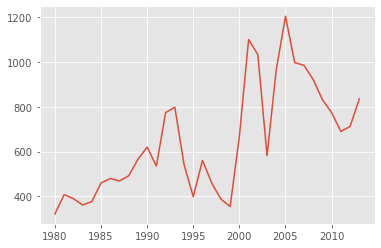

In [36]:
Singapore.plot()

*pandas* automatically populated the x-axis with the index values (years), and the y-axis with the column values (population). 

However, notice how the years were not displayed because they are of type *string*. We need to change the type of the index values to *integer* for plotting.

Also, its unclear what each axis is or what this plot is about - so please label the x and y axis using 'plt.title()', 'plt.ylabel()', and 'plt.xlabel()':

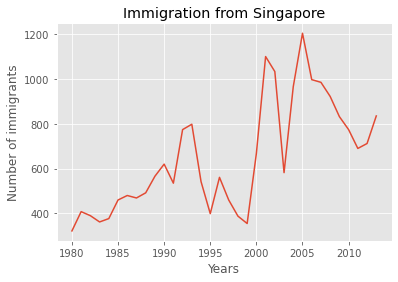

In [37]:
# Change the index values to type integer for plotting
Singapore.index = Singapore.index.map(int)
Singapore.plot(kind='line')

plt.title('Immigration from Singapore')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() # need this line to show the updates made to the figure

We can clearly notice how number of immigrants from Singapore was on the upawrd trend but spiked down from 2001-2003 as the United States stepped up its efforts to counter Terrorism. 

Please annotate this spike in the plot by using the 'plt.text()' method.

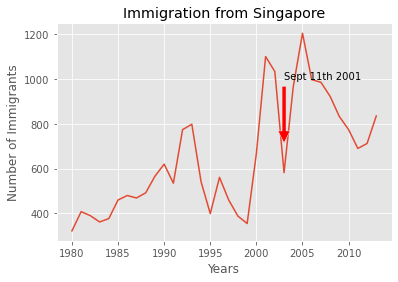

In [38]:
Singapore.plot(kind='line')

plt.title('Immigration from Singapore')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2001 Event. 
# syntax: plt.text(x, y, label)
plt.annotate('Sept 11th 2001', xy = (2003, 700),
             xytext =(2003, 1000), 
             arrowprops = dict(facecolor ='red', 
                               shrink = 0.05),
            )
plt.show() 

We can easily add more countries to line plot to make meaningful comparisons immigration from different countries. 

**Question:** Compare the number of immigrants from Malaysia and Thailand.


Step 1: Get the data set for Malaysia and Thailand, and display dataframe.

In [39]:
### type your answer here
df_MT = df_usa.loc[['Malaysia', 'Thailand'], years]
df_MT.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Malaysia,795,1033,1046,852,879,939,886,1016,1250,1506,...,1987,2632,2281,2149,1945,2014,1714,2273,2605,2477
Thailand,4115,4799,5568,5875,4885,5239,6204,6733,6888,9332,...,4318,5505,11749,8751,6637,10444,9384,9962,9459,7583


Step 2: Plot graph.

*Hint: **pandas** will plot the indices/rows ('country') on the x-axis and the columns ('year') as individual lines on the y-axis. This will not be correct, so you need to swap the row and column using the 'transpose' method

In [40]:
df_MT = df_MT.transpose()
df_MT.head()

Country,Malaysia,Thailand
1980,795,4115
1981,1033,4799
1982,1046,5568
1983,852,5875
1984,879,4885


*pandas* will auomatically graph the two countries on the same graph. Go ahead and plot the new transposed dataframe. Make sure to add a title to the plot and label the axes.

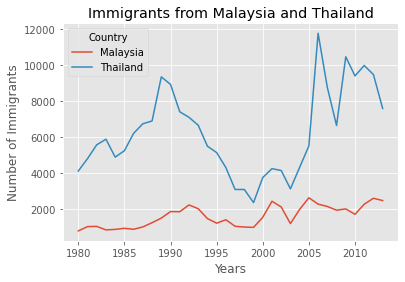

In [41]:
df_MT.index = df_MT.index.map(int) # Change index values to integer for plotting
df_MT.plot(kind='line')

plt.title('Immigrants from Malaysia and Thailand')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

From the above plot, we can observe that the Malaysia and Thailand have a similar dip. 

**Question:** Compare the trend of top 5 countries that contributed the most to immigration to Unites States.

In [42]:

# Step 1: Get the dataset. Recall that we created a Total column that calculates the cumulative immigration by country. 
# We will sort on this column to get our top 5 countries using pandas sort_values() method.
# inplace = True paramemter saves the changes to the original df_can dataframe
df_usa.sort_values(by='Total', ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_usa.head(5)

# transpose the dataframe
df_top5 = df_top5[years].transpose()

print(df_top5)

Country  Mexico Philippines  China  India Viet Nam
1980      56680       42316  27651  22607    43483
1981     101268       43772  25803  21522    55631
1982      56106       45102  27100  21738    72553
1983      59079       41546  25777  25451    37560
1984      57557       42768  23363  24964    37236
1985      61077       47978  24787  26026    31895
1986      66533       52558  25106  26227    29993
1987      72351       50060  25841  27803    24231
1988      95039       50697  28717  26268    25789
1989     405172       57034  32272  31175    37739
1990     679068       63756  31815  30667    48792
1991     946167       63596  33025  45064    55307
1992     213802       61022  38907  36755    77735
1993     126561       63457  65578  40121    59614
1994     111398       53535  53985  34921    41345
1995      89932       50984  35463  34748    41752
1996     163556       55868  41720  44838    42053
1997     146833       49102  41128  38048    38511
1998     131353       34416  36

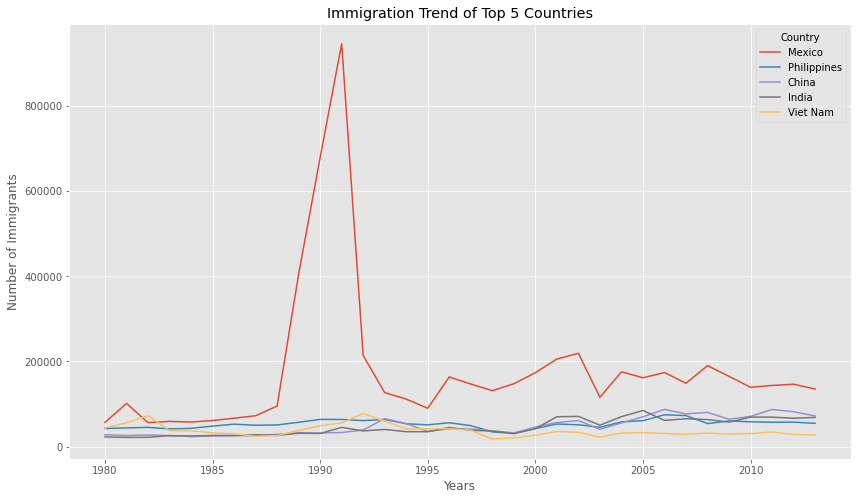

In [43]:
# Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

# Area Plots <a id="14"></a>

Please create a cumulative plot, also known as a **Stacked Line Plot** or **Area plot**. 

Note: Area plots are stacked by default. And to produce a stacked area plot, each column must be either all positive or all negative values (any NaN values will defaulted to 0). To produce an unstacked plot, pass `stacked=False`. 

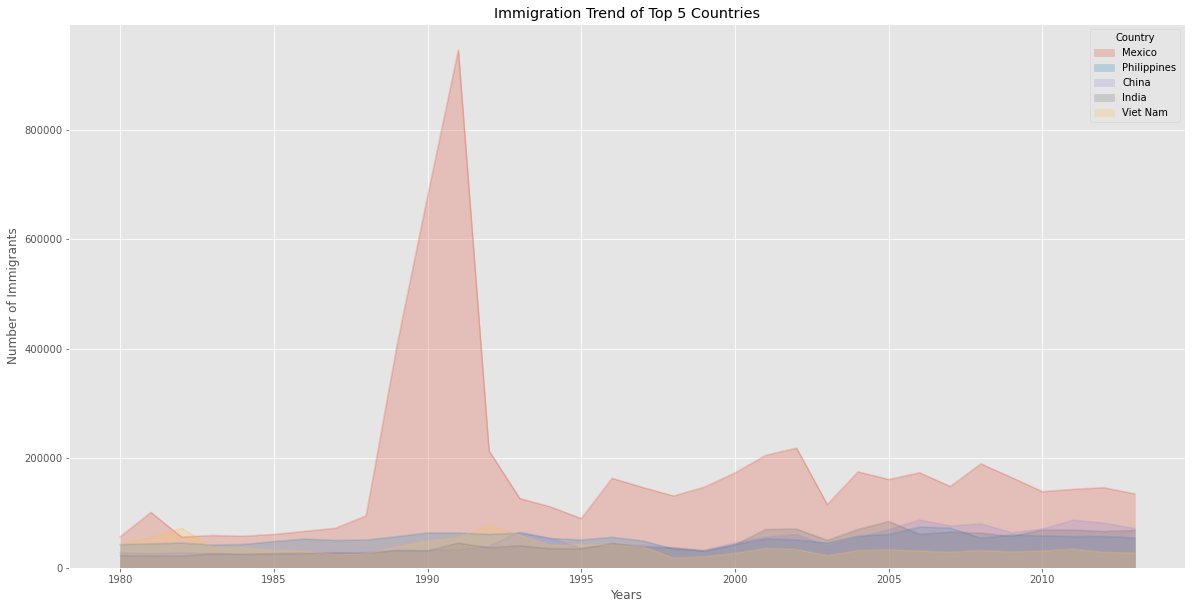

In [44]:
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting

# The unstacked plot has a default transparency (alpha value) at 0.5. 
# We can modify this value by passing in the `alpha` parameter.
df_top5.plot(kind='area',
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Histograms<a id="16"></a>

A histogram is a way of representing the *frequency* distribution of numeric dataset. The way it works is it partitions the x-axis into *bins*, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. 

Please plot a histogram of the immigration status for Singapore, Malaysia and Thailand from 1980-2013

In [45]:
# You will need to transpose the data set to plot population frequency distribution for the 3 countries
df_t = df_usa.loc[['Singapore', 'Malaysia', 'Thailand'], years].transpose()
df_t.head()

Country,Singapore,Malaysia,Thailand
1980,322,795,4115
1981,408,1033,4799
1982,390,1046,5568
1983,362,852,5875
1984,377,879,4885


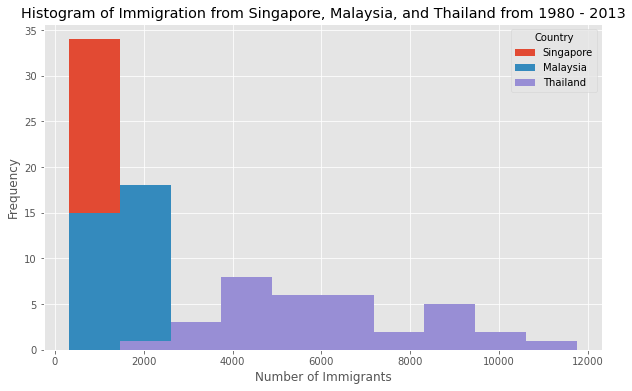

In [55]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Singapore, Malaysia, and Thailand from 1980 - 2013')
plt.ylabel('Frequency')
plt.xlabel('Number of Immigrants')

plt.show()

# Bar Charts (Dataframe) <a id="18"></a>

A bar plot is a way of representing data where the *length* of the bars represents the magnitude/size of the feature/variable. Bar graphs usually represent numerical and categorical variables grouped in intervals. 

To create a bar plot, we can pass one of two arguments via 'kind' parameter in 'plot()':

* 'kind=bar' creates a *vertical* bar plot
* 'kind=barh' creates a *horizontal* bar plot

Lets analyze what effect the Asian Financial Crisis in 1997 had on Singapore

In [47]:
df_spore = df_usa.loc['Singapore', years]
df_spore.head()

1980    322
1981    408
1982    390
1983    362
1984    377
Name: Singapore, dtype: object

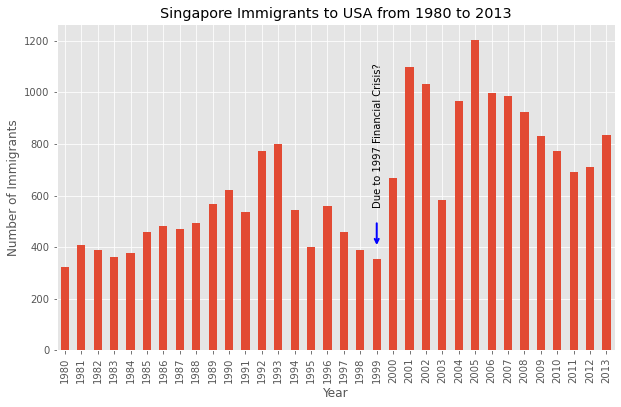

In [48]:
# step 2: plot data
df_spore.plot(kind='bar', figsize=(10, 6), rot=90) 

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Singapore Immigrants to USA from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. will leave it blank for no text
             xy=(19, 400),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(19, 500),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )

# Annotate Text
plt.annotate('Due to 1997 Financial Crisis?', # text to display
             xy=(18.75, 550),                    # start the text at at point (year 2008 , pop 30)
             rotation=90,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

# Box Plot <a id="20"></a>

A 'box plot' is a way of statistically representing the *distribution* of the data through five main dimensions: 

- **Minimun:** Smallest number in the dataset.
- **First quartile:** Middle number between the 'minimum' and the 'median'.
- **Second quartile (Median):** Middle number of the (sorted) dataset.
- **Third quartile:** Middle number between 'median' and 'maximum'.
- **Maximum:** Highest number in the dataset.

Lets do an analysis of the 2 most populus countries in the world - China and India - and see how much immigration has taken place to the US

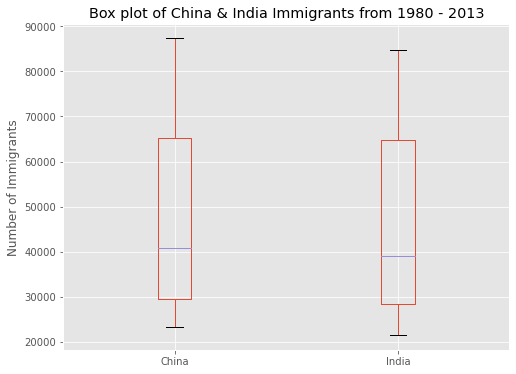

In [49]:
# to get a dataframe, place extra square brackets around 'China' & 'India'.
df_chindia = df_usa.loc[['China', 'India'], years].transpose()
df_chindia.head()

df_chindia.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of China & India Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [50]:
df_chindia.describe()

Country,China,India
count,34,34
unique,34,34
top,33025,66434
freq,1,1


Based on the analysis of the above box plot, both China and India have very similar trends.

# Bubble Plots <a id="22"></a>

Last, but certainly not least, lets analyse a 'bubble plot' which is a variation of the 'scatter plot' you learnt before. The key difference is that is can display information in three dimensions (x, y, z). Datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. In 'maplotlib', we can pass in an array or scalar to the keyword 's' to 'plot()', that contains the weight of each point.

**Let's start by analyzing the effect of China's great economic acceleration**.

China really started to open up its economy in the 1990s. How did this affect immigration to the US? Let's analyze this by comparing China's immigration to that of another economic powerhouse, Japan. Let's do that using a `bubble plot` of immigration from Japan and China for the years 1980 - 2013. The weights for the bubble will be the *normalized* value of the population for each year.

In [51]:
#Step 1: Prepare the data

df_usa_t = df_usa[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_usa_t.index = map(int, df_usa_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_usa_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_usa_t.reset_index(inplace=True)

# view the changes
df_usa_t.head()

Country,Year,Mexico,Philippines,China,India,Viet Nam,Dominican Republic,Republic of Korea,El Salvador,Cuba,...,Andorra,Wallis and Futuna Islands,Comoros,Puerto Rico,Saint Pierre and Miquelon,Tuvalu,Niue,Réunion,Falkland Islands (Malvinas),Western Sahara
0,1980,56680,42316,27651,22607,43483,17245,32320,6101,15054,...,2,0,3,0,6,0,0,0,3,0
1,1981,101268,43772,25803,21522,55631,18220,32663,8210,10858,...,3,0,1,1,4,0,0,1,2,1
2,1982,56106,45102,27100,21738,72553,17451,31724,7107,8209,...,2,0,0,2,0,0,1,1,0,1
3,1983,59079,41546,25777,25451,37560,22058,33339,8596,8978,...,1,0,1,1,1,0,8,2,0,2
4,1984,57557,42768,23363,24964,37236,23147,33042,8787,10599,...,0,0,0,3,1,0,0,0,1,0


Step 2: Create the normalized weights. 

There are several methods of normalizations in statistics, each with its own use. In this case, we will use [feature scaling](https://en.wikipedia.org/wiki/Feature_scaling) to bring all values into the range [0,1]. The general formula is:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">

where *`X`* is an original value, *`X'`* is the normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the datapoints are scaled to a value between 0-1 accordingly.

In [52]:
#Step 2: Normalize the data

China = df_usa_t['China'].astype(float)
Japan = df_usa_t['Japan'].astype(float)
yr = list(range(1980, 2014))

# normalize China data
#norm_CN = (df_usa_t['China'] - df_usa_t['China'].min()) / (df_usa_t['China'].max() - df_usa_t['China'].min())
norm_CN = (China - China.min()) / (China.max() - China.min())

# normalize Japan data
#norm_JP = (df_usa_t['Japan'] - df_usa_t['Japan'].min()) / (df_usa_t['Japan'].max() - df_usa_t['Japan'].min())
norm_JP = (Japan - Japan.min()) / (Japan.max() - Japan.min())

#norm_CN = China / China.max() 
#norm_JP = Japan/Japan.max()

Step 3: Plot the data. 
- To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the `ax` parameter. 
- We will also pass in the weights using the `s` parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore we will:
    - multiply weights by 2000 to scale it up on the graph, and,
    - add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

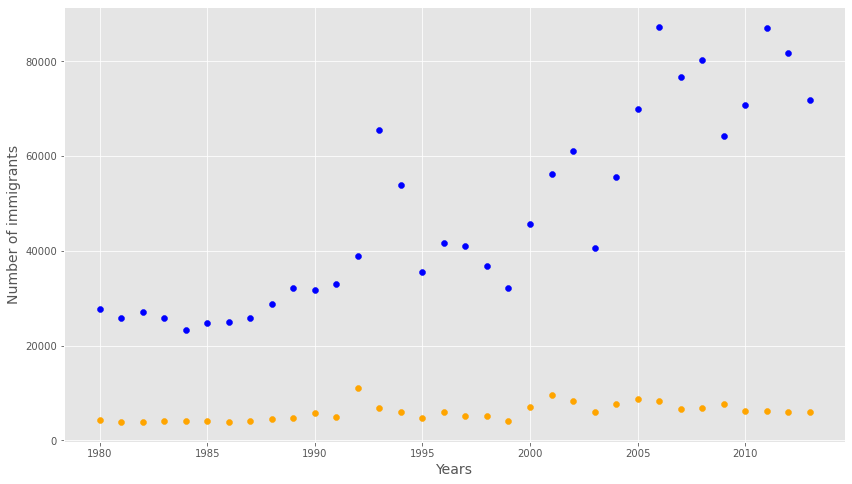

In [53]:
# A simple Scatter plot to test the idea

plt.figure(figsize=(14, 8))
plt.scatter(yr, China, color='blue')
plt.scatter(yr, Japan, color='orange')
plt.xlabel("Years", size=14)
plt.ylabel("Number of immigrants", size=14)
plt.show()

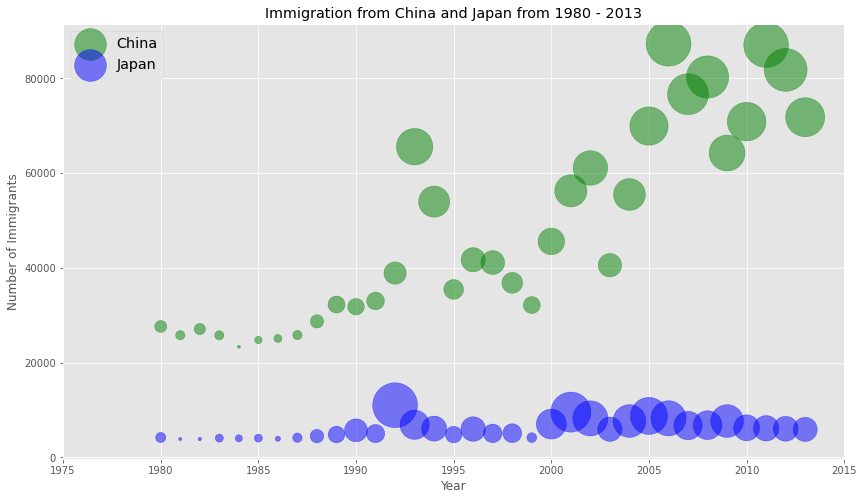

In [54]:
# China
ax0 = df_usa_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_CN * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Japan
ax1 = df_usa_t.plot(kind='scatter',
                    x='Year',
                    y='Japan',
                    alpha=0.5,
                    color="blue",
                    s=norm_JP * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and Japan from 1980 - 2013')
ax0.legend(['China', 'Japan'], loc='upper left', fontsize='x-large')

### Other Plots

There are many other plotting styles available other than the ones above, all of which can be accessed by passing 'kind' keyword to 'plot()'. The full list of available plots are as follows:

* `barh` for horizontal bar plots
* `kde` or `density` for density plots
* `pie` for pie plots
* `scatter` for scatter plots
* `hexbin` for hexbin plot

### Good job everyone!